<a href="https://colab.research.google.com/github/Soumyaworks/Brand-Perception-using-Twitter-Sentiment-Analysis/blob/main/AP_Project_Gr5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Brand Perception using Twitter Sentiment Analysis

**Final Year Project**

by Spandan Banerjee, Soumya Banerjee, Md Junaid Omar and Aritra Bhattacharjya

of CSE Department *(Batch of 2021)*

*St. Thomas' College of Engineering and Technology*

*Kolkata, WB, India*

If we want to buy a product, e.g. a soft drink, and the store has Coke and Pepsi as the two available options,
which one should we go for? While advertising and other ways are continuously adopted to help build a
brand image they are not a great measure for judging such products, relying highly on psychological
manipulation. Similarly, while comparing leaders of the world, journalists will have their own opinions,
which may or may not represent the sentiment of the people as a whole. An owner of a country might be
thinking of handing a project to an IT Company. In such a situation, the manager would want a wider and trustworthy opinion rather than look up answers on sites like Quora or reviews on Google. In such
situations, our project would be useful to provide some calm to this chaos. The user needs to enter the brands that need to be compared and a solution will be provided based on all the information gathered from the latest tweets from Twitter. The solution will contain insights and analytics based on tweets, which will be processed and normalised to be model-ready.

##Accessing tweets from Twitter

We applied for a [Twitter Developer Account](https://developer.twitter.com/) in the name of team member Spandan Banerjee (@sban2009). Access was granted weeks after applying.
We will use third party Python package [Tweepy](https://github.com/tweepy/tweepy) to access Twitter REST APIs and access the tweets as per requirement.

There are certain limitations in accessing data using the official APIs (like the number of tweets), which can be overcome by using [Twint](https://https://github.com/twintproject/twint), which is more of a web scraper. This [article](https://towardsdatascience.com/what-python-package-is-best-for-getting-data-from-twitter-comparing-tweepy-and-twint-f481005eccc9) sheds some light on the differences between the two, but we will try to make out own comparison and choose one of the two, or both.

### Comparing libraries

#### Tweepy

In [ ]:
# TWEEPY INSTALLATION
!pip install tweepy

In [ ]:
# USING TWEEPY
import tweepy

# Consumer key and Consumer secret act like the ID and Password for communicating with Twitter APIs
consumerKey='abcdefgh'
consumerSecret='123456789'
# Creating an OAuthHandler instance
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# The following code would have been needed if we used OAuth 1a Authentication (app access using user),
# but since we only need read-only access, we will use OAuth 2 Authentication (app access only)

# auth.set_access_token('404855576-gK5wE13lXIF77O0TuRcFSAzx5wKsIFESmwRvQhYl', 'ucWj8uZW8iWWcBhvcJTxVqWVehh9d3eKIwdvZvncTP0sg')

# Constructing the API instance
api = tweepy.API(auth)

# OAuth 1a code (not needed)
# tweets = api.user_timeline('sban2009', count=10)

# Testing the Authentication
searchQuery='pepsi'
for tweet in tweepy.Cursor(api.search, q=searchQuery,lang='en').items(20):
    print(tweet.user.screen_name+': '+tweet.text+'\n')

GhabranaNahiHay: RT @DennisCricket_: When you order a Pakola but they bring you a Pepsi https://t.co/VOrmAWpX9h

honest_pepsi: @Ihatethisappffs GOAT tier

abdullahamer137: @pepsi I have a problem with the agent in Riyadh and it was explained in private

Newhamz1: @LFC_NatPhillips @honest_pepsi Had to test it 😭😭😭

Javier57165296: Hey @pepsi it's June 23, 2021 at 02:02PM and I still don't have a Pepsi Holiday Spice in my hands.

kazziem1: RT @Tesco: Once teammates. Now opponents. @PepsiMaxUK and Tesco Burgers are set to disrupt dinnertime in the third quarter final.

Comment…

okayasad: RT @DennisCricket_: When you order a Pakola but they bring you a Pepsi https://t.co/VOrmAWpX9h

Ayah64002777: RT @iufap: Solidarity from Philippine!! Pepsi Cola Zamboanga union in solidarity with @UnitedWorkersOz members on strike @GeneralMills in #…

SpaceSanjeet: RT @DennisCricket_: When you order a Pakola but they bring you a Pepsi https://t.co/VOrmAWpX9h

ZeroBjt: RT @LeDubbiiBakAtIt: Me and LeKarim w

We used [tweet searching](http://docs.tweepy.org/en/latest/api.html#search-methods) to find out if our authentication is working. We limited our tweets to the English language. This returns the latest tweets about the search query (in this case, pepsi). The documentation for Tweepy is top-notch and we had no problems in running this code.

Now, let's do the same using Twint and compare the results.

#### Twint

In [ ]:
# TWINT INSTALLATION
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Processing /content/twint
     |████████████████████████████████| 1.3MB 3.2MB/s 
     |████████████████████████████████| 266kB 9.0MB/s 
     |████████████████████████████████| 358kB 9.5MB/s 
     |████████████████████████████████| 143kB 10.1MB/s 
     |████████████████████████████████| 296kB 9.9MB/s 
     |████████████████████████████████| 296kB 11.0MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13501 sha256=c0bd4b9e33a6dac44071f4aa603f7b720fce1c66b8277088a8d8e6cd1721fea7
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=15970 s

In [ ]:
# USING TWINT
import twint

# Configure
t = twint.Config()

# Setting properties of Config instance
t.Search = 'pepsi'
t.Store_object = True
t.Lang='en'
t.Limit = 1
t.Verified=True

# To avoid any loop errors
import nest_asyncio
nest_asyncio.apply()

# Shows search results
twint.run.Search(t)

1407669802605416453 2021-06-23 12:00:08 +0000 <HyVee> We’re your favorite grocery store with the best deals! 🔥 Check out this week’s Hot Deals:  🧀 Kraft natural cheese, $1.97/select varieties  🥤 Pepsi products, 4/$8.88  🥨 Rold Gold pretzels, $1.88/select varieties  Shop more savings here:  https://t.co/NzxC4BgieM.  https://t.co/fLM25w1r1p
1407668083259449345 2021-06-23 11:53:18 +0000 <DennisCricket_> When you order a Pakola but they bring you a Pepsi  https://t.co/VOrmAWpX9h
1407653633479544836 2021-06-23 10:55:53 +0000 <zchagla> Relax folks, we’re in an incredible position to even have vaccines and we’re loosing sight of the goal.  To get people vaccinated and get back to normal life.  Mixing mRNA vaccines is like drinking coke then Pepsi    https://t.co/6SrNayb9W1
1407651644976766982 2021-06-23 10:47:59 +0000 <CNNIndonesia> FOTO: Pabrik Pepsi Gaza Tutup Efek Israel Batasi Impor  https://t.co/VqY2dWjaMe
1407647881935278081 2021-06-23 10:33:02 +0000 <medcom_id> Potret Pabrik Pepsi di G

Initial errors related to loops were eliminated using the [nest_asyncio](https://pypi.org/project/nest-asyncio/) module of PyPi. Further errors were eliminated by directly cloning the Git and updating the requirements.

The biggest advantage over Tweepy is that the number of tweets is not limited by the Twitter API, it is only dependent on how much Twitter allows the web scraper to scroll on the site (which, to our knowledge, is fixed). So we will be using Twint as the tweet extractor for this project.

## Importing Libraries

In [ ]:
# TWINT INSTALLATION
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt
%cd ..
# W3LIB INSTALLATION
!pip install w3lib

# FLAIR INSTALLATION
# !pip install flair

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Processing /content/twint
     |████████████████████████████████| 1.3MB 29.8MB/s 
     |████████████████████████████████| 266kB 39.1MB/s 
     |████████████████████████████████| 358kB 38.1MB/s 
     |████████████████████████████████| 143kB 41.0MB/s 
     |████████████████████████████████| 296kB 40.7MB/s 
     |████████████████████████████████| 296kB 41.0MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13501 sha256=bc9d709108a02f1a161e800c909dc050f565986b94d3d229869cadb09f5a0566
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=159

In [ ]:
# Tweet extractor
import twint

# Infinite loop problems
import nest_asyncio

# Data storage, manipulation
# visualization and calculation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Regular expressions
import re as regex

# Special characters
from string import punctuation

# HTML Entity
from w3lib.html import replace_entities

# Natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Word Clouds
from wordcloud import WordCloud, STOPWORDS

# Sentiment Analysis Models
## NLTK-VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
## TextBlob
from textblob import TextBlob
## Flair
import flair
## BERT/Others
# 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Tweet Extraction and Storage

Documentation for Twint: [GitHub Wiki](https://github.com/twintproject/twint/wiki)

In [ ]:
# Input
brand_name = 'pepsi'

# Searching
c = twint.Config()
c.Search = brand_name

# Other configurations
c.Lang='en'
c.Limit = 2500 # Can be increased according to requirement
                # at the expense of execution time
c.Filter_retweets = True
# c.Store_csv = True    # if needed to store in CSV
# c.Output = 'tweet_data.csv'
c.Pandas = True

nest_asyncio.apply()

twint.run.Search(c)

We can also use [SQLite](https://github.com/twintproject/twint/wiki/Storing-objects-in-a-DB) for storage, but Pandas dataframe will be more useful in our case.

In [ ]:
# Using the Pandas storage of Twint
Tweets_df = twint.storage.panda.Tweets_df

In [ ]:
Tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2077 non-null   object 
 1   conversation_id  2077 non-null   object 
 2   created_at       2077 non-null   float64
 3   date             2077 non-null   object 
 4   timezone         2077 non-null   object 
 5   place            2077 non-null   object 
 6   tweet            2077 non-null   object 
 7   language         2077 non-null   object 
 8   hashtags         2077 non-null   object 
 9   cashtags         2077 non-null   object 
 10  user_id          2077 non-null   int64  
 11  user_id_str      2077 non-null   object 
 12  username         2077 non-null   object 
 13  name             2077 non-null   object 
 14  day              2077 non-null   int64  
 15  hour             2077 non-null   object 
 16  link             2077 non-null   object 
 17  urls          

We will only take a subset of the tweet data - the `username`, `name`, tweet `id`, `language` (only English supported for now) and the `tweet` itself.

In [ ]:
Tweets_df.sample(5)

# Creating a dataframe for further processing
df = Tweets_df[['username', 'name', 'id', 'language', 'tweet']]

df.shape

(2077, 5)

In [ ]:
df.sample(3)

,username,name,id,language,tweet
1764,154Korean,みく,1407654276525039617,ja,おつかれジブンっ!な瞬間に、BIGに #生きかえるうまさ の #ペプシ生 ！ @pepsi_...
2048,akinko1105,アキ,1407652426270662656,ja,おつかれジブンっ!な瞬間に、BIGに #生きかえるうまさ の #ペプシ生 ！ @pepsi_...
1892,maro082,マロポン,1407653327836311558,ja,おつかれジブンっ!な瞬間に、BIGに #生きかえるうまさ の #ペプシ生 ！ @pepsi_...


## Pre-processing Tweets

### Tweet Filtering

In our tweets database, we cannot include tweets made by the brand's official accounts (e.g. if 'pepsi' is the search term, we cannot consider 'Pepsi India' or 'PepsiCo' tweets) or fan pages (e.g. for 'ipl' we cannot consider 'IPL Fan Club' as a valid tweet source). To minimise bias in our result, our first step would be to eliminate these data points.

We also see that non-English tweets have creeped into the database even after Twint was configured not to do so. So we perform an extra step to remove these.

In [ ]:
# Drop empty values
df = df.dropna(how = 'all')

# Drop non-English tweets
df.drop(df[df['language'] != 'en'].index, inplace = True)

# Drop duplicate tweets
df.drop_duplicates(inplace = True)

# Drop biased tweets
criterion1 = df['username'].map(lambda x: brand_name not in x)
criterion2 = df['name'].map(lambda x: brand_name not in x)
df = df[criterion1 & criterion2] # Apply both criteria

In [ ]:
df.sample(5)

,username,name,id,language,tweet
1250,GW_78,Georgie 🌻🍦🌞,1407657915146768385,en,@Tesco @strongbowuk @Pringles_UK @PizzaExpress...
400,Eurotrash007,KMD B.Sc 2008,1407664671981719552,en,"@zchagla It's like drinking Coke, and then a m..."
661,flysouI,flor,1407662542277672964,en,just drink a fucking pepsi lol
546,Ihatethisappffs,ғᴀʀᴀʜ ⁦🇩🇿⁩,1407663417758978052,en,@honest_pepsi Clowns
382,SpiritsSecond,Spirit,1407664811287085060,en,@honest_pepsi @brfootball Ratio?


Now, we are in a position to drop the username, name and language data, as it is not required for our NLP processes.

In [ ]:
# Create the final database
df.drop(columns = ['id','username', 'name', 'language'], inplace = True)

In [ ]:
df.sample(20)

,tweet
769,Yea but Pepsi way better 👍🏽😅
8,@GalacticoRM7 @honest_pepsi @brfootball But he...
1394,@N4M_J1N Am I the only one who thinks pepsi an...
1681,@PlanOnfire Goes back to the whole Pepsi vs Co...
1536,@wjsteez @GaiaTheLovley @yungskuntebony lemona...
1436,@John1MUFC @honest_pepsi Thots on this ratio
1716,@zchagla While I agree with the MRNA vaccines ...
404,@Tesco @strongbowuk @Pringles_UK @PizzaExpress...
49,I need to actually write down or type out lore...
1510,@AudacityRants When I become rich I'll smoke P...


### Tweet Cleansing and Normalization

The following steps can be performed on our current tweets dataframe:
* Remove website URLs
* Remove unnecessary punctuation
* Remove numbers
* Remove usernames (@mentions)
* Remove emojis (as much as possible)
* Unroll hashtags
* Remove HTML entities like `&amp;` `&lt;` `&gt;` etc.



We will use regular expressions for this purpose. A fully processed tweet conversion would be: "this was an amazing day 2021!!! #lit @JohnM" to "this was an amazing day lit" but we will be partially converting to prevent data loss.








In [ ]:
# General method for removal based on regex
def remove_by_regex(tweets, regexp):
        tweets.loc[:, 'tweet'].replace(regexp, '', inplace=True)
        return tweets

In [ ]:
# URL Remover, which calls the general method
def remove_urls(tweets):
    return remove_by_regex(tweets, regex.compile(r"(http?\://|https?\://|www)[^\s]+[\s]?"))

# Username and other @ mentions Remover
def remove_usernames(tweets):
    return remove_by_regex(tweets, regex.compile(r"@\S+"))

# HTML Entity Remover
def html_entity(tweet):
    return replace_entities(tweet)

**To be noted:** Emoji analysis ([example1](https://advertools.readthedocs.io/en/master/advertools.emoji.html), [example2](https://github.com/huggingface/torchMoji)) can be done in Python, but we are focussing on text in our project

In [ ]:
df_original=df.copy() # For comparison only

In [ ]:
df = remove_usernames(df)
df = remove_urls(df)
df = df.applymap(html_entity)

In [ ]:
df.sample(5)

,tweet
1505,Thots on overmars transfer
1716,While I agree with the MRNA vaccines being th...
1366,They used to sell Mini coke/pepsi etc in As...
560,"If you have any can, bottle or box of cans of ..."
1420,I gave up all pop 13years ago when I was pre...


Now, we convert the data to lower case

In [ ]:
df = df.applymap(lambda s:s.lower())

Now we remove stop words. Stop words are common English words that contribute nothing to the final meaning of the sentence. Removing them are necessary for accurate NLP results.

However, there are some words which might be classified as stop words but contain some sentiment, which will be lost on removal. Such words (or parts of words) are *don't, can't, shouldn't,* etc.

In [ ]:
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df['tweet'].apply(lambda sentence: [word for word in sentence if word not in stop])

8        [ ,  ,  , b, u,  , h, e, ',  , w, r, n, g, ?, .]
46      [ , h, p, e,  , r, e, l,  , r,  , n,  , g, e, ...
49      [ , n, e, e,  ,  , c, u, l, l,  , w, r, e,  , ...
106     [ , u,  , r, e,  , f, r,  , n, e, h, e, r, l, ...
158                                          [ , g,  , +]
                              ...                        
1924           [ ,  ,  , n, c, e, !, !, !, !,  , w,  ,  ]
1932    [ , b,  , h, e,  , c, u, l, n, ’,  , k, e,  , ...
1945    [ , h, n, k,  , n,  , r, r, w,  ,  ,  , l,  , ...
1997    [h, n, k,  , f, r,  , l, e, n, n, g,  ,  , q, ...
2053    [ , e, e,  , l, k, e,  , h, e,  , c, k, e,  , ...
Name: tweet, Length: 86, dtype: object

In [ ]:
# Punctuation Remover
def remove_punctuation(tweet):
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return regex.sub(pat, '', tweet)
# FOR TOTAL REMOVAL OF PUNCTUATION ^ comment v uncomment
#   for remove in map(lambda r: regex.compile(regex.escape(r)),
#                      list(punctuation)):
#        tweets.loc[:, 'tweet'].replace(remove, '', inplace=True)
#    return tweets
# df = remove_punctuation(df)

In [ ]:
df = df.applymap(remove_punctuation)

In [ ]:
# Emoji Remover, which calls the general method and uses UNICODE
def remove_emojis(tweets):
    emoji_pattern = regex.compile("["
                                    u"\U0001F600-\U0001F64F"  # emoticons
                                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                    u"\U00002500-\U00002BEF"  # chinese characters
                                    u"\U00002702-\U000027B0"
                                    u"\U00002702-\U000027B0"
                                    u"\U000024C2-\U0001F251"
                                    u"\U0001f926-\U0001f937"
                                    u"\U00010000-\U0010ffff"
                                    u"\u2640-\u2642" 
                                    u"\u2600-\u2B55"
                                    u"\u200d"
                                    u"\u23cf"
                                    u"\u23e9"
                                    u"\u231a"
                                    u"\ufe0f"  # dingbats
                                    u"\u3030"
                                    "]+", regex.UNICODE)
    return remove_by_regex(tweets,emoji_pattern)

In [ ]:
df = remove_emojis(df)

In [ ]:
df_original['processed_tweet']=df['tweet']
df_original.sample(20)

,tweet,processed_tweet
1387,Sponsored by Pepsi. https://t.co/JlBzdrJcgA,sponsored by pepsi.
546,@honest_pepsi Clowns,clowns
729,Jesus christ it's actually like I'm peeing pepsi.,jesus christ it's actually like i'm peeing pepsi.
1829,@Moosiferocious He looks like he’s a Coke guy ...,he looks like hes a coke guy but has to get p...
753,@maryamkhan05 What is PSP is that Pakistan sup...,what is psp is that pakistan super pepsi
1932,too bad she couldn’t take her name off that pe...,too bad she couldnt take her name off that pep...
1394,@N4M_J1N Am I the only one who thinks pepsi an...,am i the only one who thinks pepsi and coke t...
1353,Let's do this! 1) I like all things Warhammer ...,let's do this! 1 i like all things warhammer 2...
1408,@I_WannaBuyBrain @John1MUFC @honest_pepsi Cold,cold
520,@honest_pepsi Big dub,big dub


In [ ]:
# Saving processed data
df_original.to_excel('processed_tweets.xlsx',index=False)
del df_original

### Further processing (optional, TBD)

In [ ]:
# Number Remover, which calls the general method
def remove_numbers(tweets):
    return remove_by_regex(tweets, regex.compile(r"\s?[0-9]+\.?[0-9]*"))

In [ ]:
df_processed = remove_numbers(df)

In [ ]:
#Stemming

In [ ]:
#Lemmatization

In [ ]:
#POS Tagging...embedding...others

https://towardsdatascience.com/text-cleaning-methods-for-natural-language-processing-f2fc1796e8c7

## Choosing a Sentiment Analysis Model


Sentiment Analysis is a Natural Language Processing (NLP) Technique where sentiment is extracted from
text. A sentiment analyser specifies the overall emotional content of the passed text, while it can be further
broken down and if required categorized into positive, negative or neutral.

While some models rely simply on words and their frequencies, others are more context-driven and find the
association between words before finalising the overall emotional content. The problem with some of the
models is that they need to be trained, which would take up a considerable amount of time. Our project tends
to show a generalised result since other papers have already dealt with singular brands.

Our goal is to find out which one of these performs the best with tweets. If more than one perform with similar accuracy, we will try to use an ensemble technique. The last resort would be to create our own model which, given our time constraints, is impractical.

We have chosen a list of models as given below:

In [ ]:
# Uncomment if processed data required:
# df=df_processed

In [ ]:
# Example sentence for testing models
sentence = 'XYZ is a bad company. But all the employees are amazing. That makes it fine, I guess?'

### NLTK-Vader

NLTK's [Vader](https://www.nltk.org/_modules/nltk/sentiment/vader.html) sentiment analysis tool uses a bag of words approach (a lookup table of positive and negative words) with some simple heuristics. Due to this simple nature, literal meanings will mostly be chosen, which is not how people usually interact on social media. Another downside would be out-of-vocabulary (OOV) words will not be analysed.

In [ ]:
data=df.copy()
data.sample(1)

,tweet
388,it was what i was drinking for a good two hour...


In [ ]:
analyzer=SentimentIntensityAnalyzer()

tokenized_sentence = nltk.word_tokenize(sentence) # Example

pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (analyzer.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (analyzer.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)                

print('Positive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list)
print('\nScores:', analyzer.polarity_scores(sentence))

Positive: ['amazing', 'fine']
Neutral: ['XYZ', 'is', 'a', 'company', '.', 'But', 'all', 'the', 'employees', 'are', '.', 'That', 'makes', 'it', ',', 'I', 'guess', '?']
Negative: ['bad']

Scores: {'neg': 0.166, 'neu': 0.569, 'pos': 0.265, 'compound': 0.2732}


In [ ]:
data['negative']=[analyzer.polarity_scores(x)['neg'] for x in data['tweet']]
data['neutral']=[analyzer.polarity_scores(x)['neu'] for x in data['tweet']]
data['positive']=[analyzer.polarity_scores(x)['pos'] for x in data['tweet']]
data['overall']=[analyzer.polarity_scores(x)['compound'] for x in data['tweet']]

data['sentiment_type']=''
data.loc[data.overall>0,'sentiment_type']='POSITIVE'
data.loc[data.overall==0,'sentiment_type']='NEUTRAL'
data.loc[data.overall<0,'sentiment_type']='NEGATIVE'

data.head(5)

,tweet,negative,neutral,positive,overall,sentiment_type
8,but he's wrong?.,0.000,1.0,0.00,0.0000,NEUTRAL
46,hope real madrid aint gae like barca,0.211,0.5,0.29,0.1999,POSITIVE
49,i need to actually write down or type out lore...,0.000,1.0,0.00,0.0000,NEUTRAL
106,you are from netherlands?,0.000,1.0,0.00,0.0000,NEUTRAL
158,goat sss,0.000,1.0,0.00,0.0000,NEUTRAL


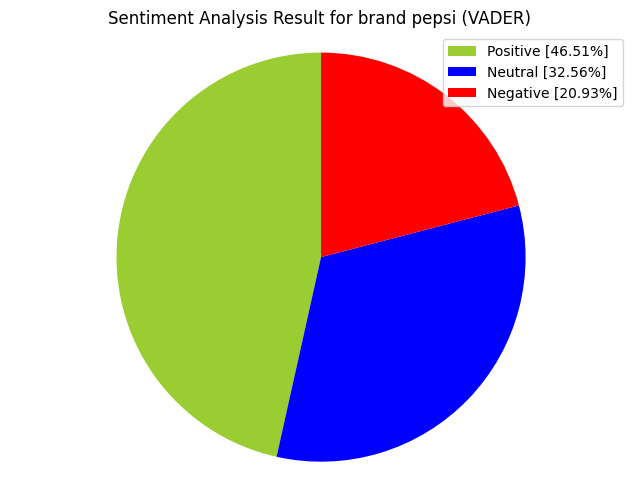

In [ ]:
positive=data.sentiment_type.value_counts()['POSITIVE']
neutral=data.sentiment_type.value_counts()['NEUTRAL']
negative=data.sentiment_type.value_counts()['NEGATIVE']
#print(positive,neutral,negative)
total=positive+neutral+negative

# Pie Chart
plt.figure(figsize=(8, 6), dpi=100)
labels = ['Positive ['+str(round(positive*100/total,2))+'%]' , 'Neutral ['+str(round(neutral*100/total,2))+'%]','Negative ['+str(round(negative*100/total,2))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for brand "+brand_name+" (VADER)")
plt.axis('equal')

plt.show()

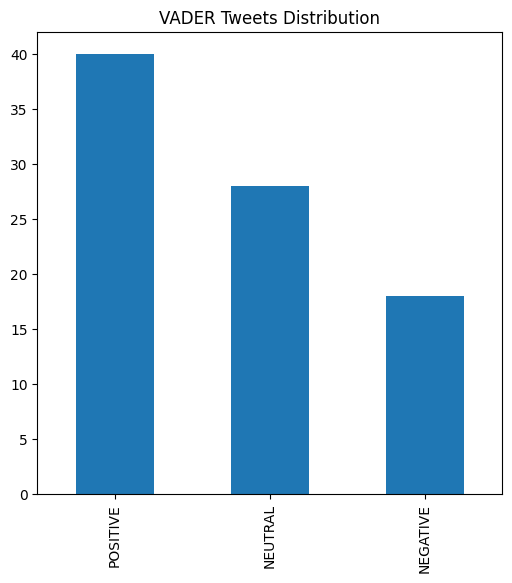

In [ ]:
# Bar Chart
plt.figure(figsize=(6, 6), dpi=100)
data.sentiment_type.value_counts().plot(kind='bar',title='VADER Tweets Distribution')

In [ ]:
data.to_csv('result_vader.csv',index=False)

### TextBlob

[TextBlob](https://textblob.readthedocs.io/en/dev/) is built from NLTK and [pattern](https://github.com/clips/pattern) libraries and is particularly good in social media text processing. Similar to NLTK, it uses the bag of words representation. It provides polarity and subjectivity (opinion, emotion, or judgement).

In [ ]:
data=df.copy()
data.sample(1)

,tweet
1924,nooooooiiice!!!! owo


In [ ]:
TextBlob(sentence).sentiment # Example

Sentiment(polarity=0.10555555555555564, subjectivity=0.6888888888888888)

In [ ]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity'] = data['tweet'].apply(get_polarity)

data['sentiment_type']=''
data.loc[data.polarity>0,'sentiment_type']='POSITIVE'
data.loc[data.polarity==0,'sentiment_type']='NEUTRAL'
data.loc[data.polarity<0,'sentiment_type']='NEGATIVE'

data.head(5)

,tweet,polarity,sentiment_type
8,but he's wrong?.,-0.500000,NEGATIVE
46,hope real madrid aint gae like barca,0.200000,POSITIVE
49,i need to actually write down or type out lore...,-0.077778,NEGATIVE
106,you are from netherlands?,0.000000,NEUTRAL
158,goat sss,0.000000,NEUTRAL


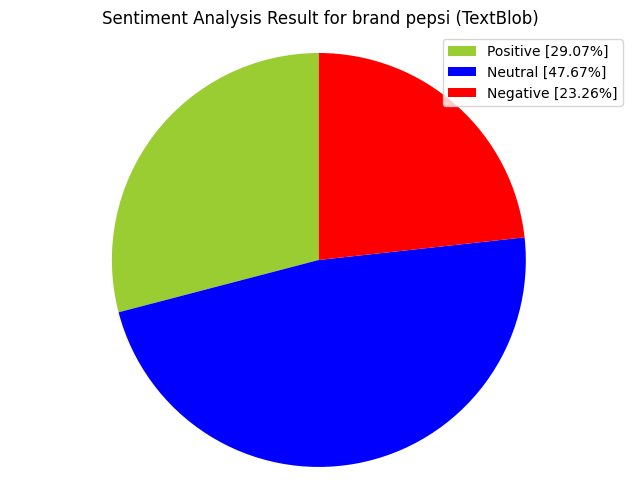

In [ ]:
positive=data.sentiment_type.value_counts()['POSITIVE']
neutral=data.sentiment_type.value_counts()['NEUTRAL']
negative=data.sentiment_type.value_counts()['NEGATIVE']
total=positive+neutral+negative

# Pie Chart
plt.figure(figsize=(8, 6), dpi=100)
labels = ['Positive ['+str(round(positive*100/total,2))+'%]' , 'Neutral ['+str(round(neutral*100/total,2))+'%]','Negative ['+str(round(negative*100/total,2))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for brand "+brand_name+" (TextBlob)")
plt.axis('equal')

plt.show()

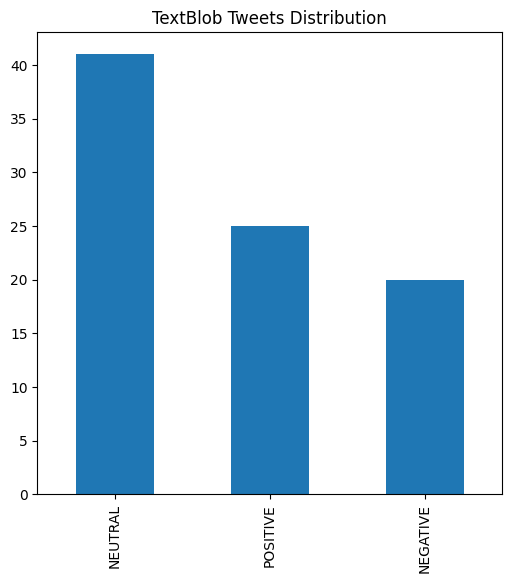

In [ ]:
# Bar Chart
plt.figure(figsize=(6, 6), dpi=100)
data.sentiment_type.value_counts().plot(kind='bar',title='TextBlob Tweets Distribution')

In [ ]:
data.to_csv('result_textblob.csv',index=False)

### Flair

[Flair](https://github.com/flairNLP/flair) is a PyTorch based library by [Zalando Research](https://www.informatik.hu-berlin.de/en/forschung-en/gebiete/ml-en/Flair). It is based on deep learning and supports various embeddings and languages. Even though it is simple, it can take into account intensity, negations and typographical errors - the last of which is not supported by the two models above.

In [ ]:
# data=df.copy()
# data.sample(1)

,tweet
778,coka cola sees all their replies and qrts by t...


In [ ]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels

total_sentiment

2021-06-23 11:54:00,635 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt
POSITIVE (0.6922)


In [ ]:
print(str(total_sentiment[0]).split()[0]) # Prints sentiment
print(str(total_sentiment[0]).split()[1][1:-1]) # Prints value

In [ ]:
# def get_sentiment(text):
#     sentObj = flair.data.Sentence(text)
#     flair_sentiment.predict(sentObj)
#     total_sentiment = sentObj.labels
#     return str(total_sentiment[0]).split()[0]

In [ ]:
# data['sentiment_type']=''
# data['sentiment_type']=data['tweet'].apply(get_sentiment)

### Other Models (TBD)

https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c

https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671

https://www.analyticsvidhya.com/blog/2020/03/6-pretrained-models-text-classification/

http://nlp.town/blog/off-the-shelf-sentiment-analysis/

https://github.com/JosephAssaker/Twitter-Sentiment-Analysis-Classical-Approach-VS-Deep-Learning/blob/master/

https://analyticsindiamag.com/top-8-pre-trained-nlp-models-developers-must-know/

## Word Clouds

The output for our project would be a statistical representation of the information gathered from the model - i.e. the positive tweets and their percentage (shown earlier for each model), most frequent terms and other measures. This will give the user a deeper understanding of the tweets that will eventually have judged a company as having a positive or negative image.

Apart from that, an important tool would be world clouds, which give an idea of most frequent words in a corpus.

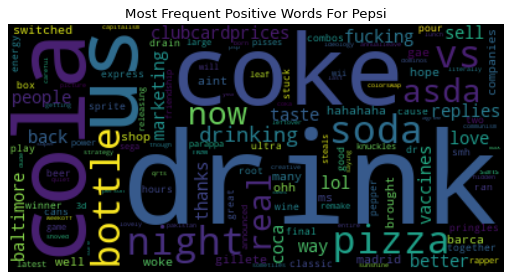

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update([brand_name]) 
pos = data.loc[data['sentiment_type'] == 'POSITIVE']
poswords=" ".join(word for word in pos.tweet)
wordcloud1 = WordCloud(stopwords=stopwords).generate(poswords)
#print(poswords)
plt.figure(figsize=(8, 8), dpi=80)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title("Most Frequent Positive Words For "+str.title(brand_name))
plt.axis("off")
plt.savefig('pepsi_positive.png')
plt.show()

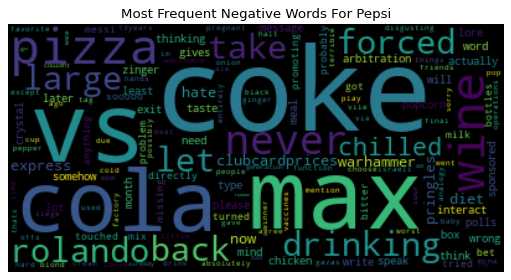

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
neg = data.loc[data['sentiment_type'] == 'NEGATIVE']
negwords=" ".join(word for word in neg.tweet)
wordcloud2 = WordCloud(stopwords=stopwords).generate(negwords)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title("Most Frequent Negative Words For "+str.title(brand_name))
plt.axis("off")
plt.savefig('pepsi_negative.png')
plt.show()

In [ ]:
# Resetting the data
twint.storage.panda.clean()

# Alternate code:
# twint.storage.panda.Tweets_df = None 

## Brand Comparison

Our aim of this project was to create an app based on a brand comparator for our final year project. The code blocks are repeated and revised from this notebook.


**Server:** [Google Colab](https://colab.research.google.com/drive/15x-yWFGtF57rOCfi9tqEONlYWeGlkoml?usp=sharing)
(NOTE: *The code will be less commented than before, as they are mostly repeated blocks.*)

**Client:** [Anvil App](https://npflbaaevoxxuyzk.anvil.app/QED54JFBPJMZBQPITDWWVL75) (RUN the server code and then use the client app)

## Scope for Improvement

1. Problems with Twint:

    *   If English tweets are kept (Lang='en'), try to configure Twint to eliminate extra processing step

    * The 'Limit' of Twint configuration object can be understood better and implemented more precisely. Due to lack of proper documentation, it could not be fully realised.

2. We can include non-English tweets by:

*   Using Google Translate or other APIs to convert to English and then use the tweet
*   Create language-specific models or look for pre-existing ones

The first one might be low on accuracy but will be easier to implement and will be more inclusive in terms of number of languages. The second option will be more specific and time-consuming.

3. Add more pre-trained sentiment analysis models and use ensemble methods to come up with the best model/average of all models/weighted average,etc. Creating a deep learning library, training, testing and using metrics to determine precision and accuracy would be the ideal scenario.

4. Creating a front end for user input and comparison details and keeping the Python code as part of back end.

5. Emojis can be included and analysed either using libraries in Python or manually using unicode. The former would be feasible.

6. Support for more than 2 (multiple) brand comparisons. This can be done by simply running a loop as
```
df_list = [df1,df2,...]
for df in df_list:
    # operations
```
7. We can also eliminate the usage of Twint by using our own web scraping code.

